Copyright **`(c)`** 2023 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# LAB9

Write a local-search algorithm (eg. an EA) able to solve the *Problem* instances 1, 2, 5, and 10 on a 1000-loci genomes, using a minimum number of fitness calls. That's all.

### Deadlines:

* Submission: Sunday, December 3 ([CET](https://www.timeanddate.com/time/zones/cet))
* Reviews: Sunday, December 10 ([CET](https://www.timeanddate.com/time/zones/cet))

Notes:

* Reviews will be assigned  on Monday, December 4
* You need to commit in order to be selected as a reviewer (ie. better to commit an empty work than not to commit)

In [70]:
from random import choices

import lab9_lib

In [71]:
fitness = lab9_lib.make_problem(1)
for n in range(10):
    ind = choices([0, 1], k=50)
    print(f"{''.join(str(g) for g in ind)}: {fitness(ind):.2%}")

print(fitness.calls)

11010000011010110111110111010111110110011111000110: 62.00%
11010000101100000011001001000110011110001001001100: 40.00%
00010110110000011101100101100001010100101110001000: 42.00%
11101011011001110010001001100000010110011111100101: 52.00%
00000101100001110110100100001001000111110000100011: 40.00%
00101001111111011110111101011110100011010110100110: 62.00%
11000101000110010010100100010011011101011110110110: 50.00%
01010110111110110001010110000100011010001011010111: 52.00%
10111100100111110010101011000001001000101000101101: 48.00%
10111010110010111100100111100100100111011000001010: 52.00%
10


In [72]:
from random import choices, random, randint, sample
import matplotlib.pyplot as plt
import numpy as np
import itertools
import math, random

In [73]:
# Function to create problem
def create_problem(size):
    return lab9_lib.make_problem(size)

In [74]:
# Initialize a population of genomes
def initial_population(size, length):
    return [choices([0, 1], k = length) for _ in range(size)]


In [75]:
def crossover(parent1, parent2):
    crossover_point = int(0.5 * len(parent1))
    child = parent1[:crossover_point] + parent2[crossover_point:]
    return child

In [76]:
def mutate(genome):
    mutation_indices = np.random.choice(len(genome), int(len(genome) * 0.1), replace=False )
    for i in mutation_indices:
      genome[i] = 1 - genome[i]
    return genome

before:  [0, 1, 0, 1, 1, 0, 0, 1, 0, 1]
after:  [0, 1, 0, 1, 1, 0, 1, 1, 0, 1]


In [78]:
# Improved tournament selection
def tournament_selection(population, fitnesses, tournament_size):
    selected = []
    for _ in range(2):
        tournament_indices = np.random.choice(len(population), tournament_size, replace=False)
        tournament = [(population[i], fitnesses[i]) for i in tournament_indices]
        winners = sorted(tournament, key=lambda x: x[1], reverse=True)
        top2 = [t[0] for t in winners[0:2]]
    return top2

In [79]:
from random import random
genome = [choices([0, 1], k = 10 ) for _ in range (10)]
fitness = np.random.random(10)*10
tournament_selection(genome, fitness, 4)

[[0, 0, 0, 1, 0, 1, 0, 1, 1, 0], [1, 1, 1, 1, 0, 0, 0, 0, 1, 0]]

In [80]:
# Elit
def elit(population, fitnesses, elite_size = 10):
    sorted_population = sorted(zip(population, fitnesses), key=lambda x: x[1], reverse=True)
    return [(individual,_) for individual, _ in sorted_population[:elite_size]]


In [119]:
# Parameters
genome_length = 1000
mutation_rate = 0.15
tournament_sizes = [3, 4, 5]
problem_instances = [1, 2, 5, 10]

# Parameter
max_iteration = [100] # Total number of generations
population_sizes = [100] # [50, 100, 200, 500] #  We may try different population sizes
crossover_rates = [0.70, 0.75, 0.8]
threshold = 10  # Number of generations without improvement to trigger termination

best_genome = None;
best_configuration = [] # keeps tuples of (fitness value, # of calls of fitness)
fitness_calls_num = {}

In [83]:
# Record keeping
best_fitness_per_instance_and_combination = {}
fitness_history_per_combination = {}
# Initialize a dictionary to store the highest fitness and configuration for each problem instance
highest_fitness_per_instance = {}

best_fitness = 0
generations_without_improvement = 0
lowest_fitness_calls = float('inf')


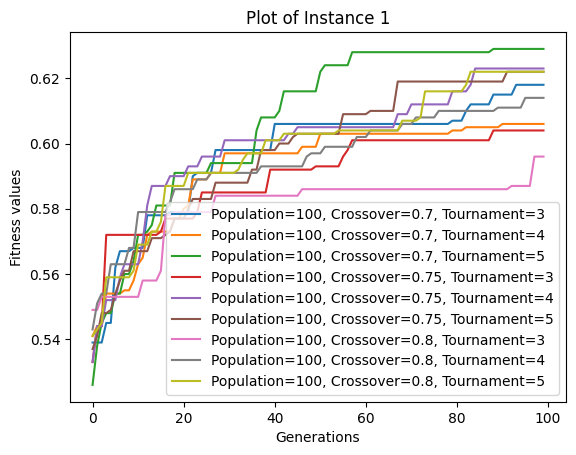

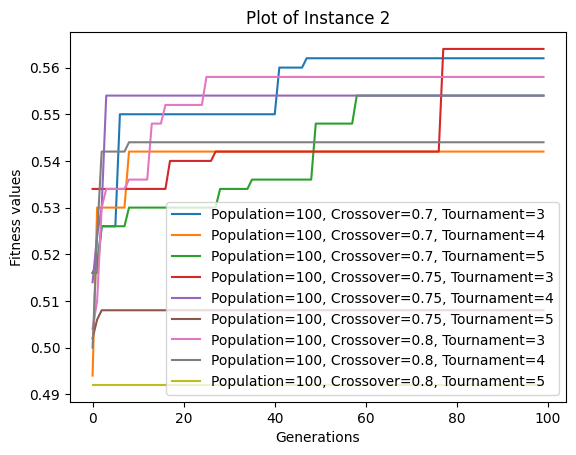

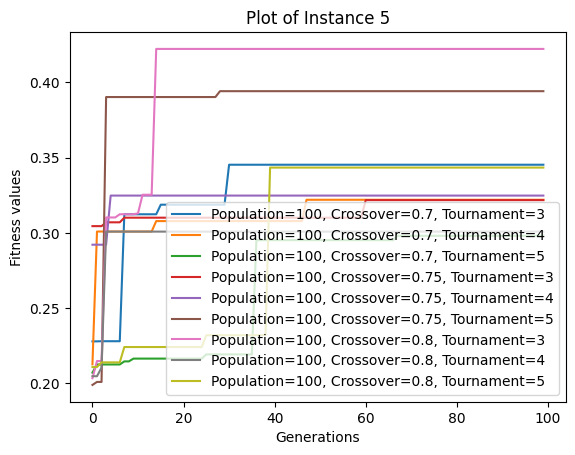

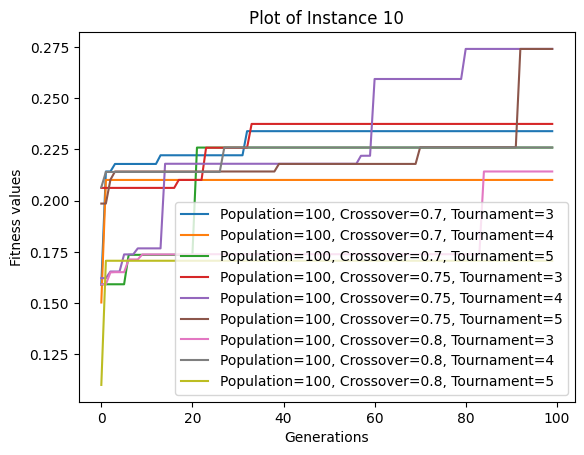

In [122]:

for instance in problem_instances:
    fitness_function = create_problem(instance)


    for population_size, crossover_rate, tournament_size in itertools.product(population_sizes, crossover_rates, tournament_sizes):

        best_configuration = []  # Reset best_configuration for each combination
        for gener in max_iteration:
            population = initial_population(population_size, genome_length)
            fitness_cache = {}
            best_fitness_history = []
            best_fitness = 0
            generations_without_improvement = 0
            min_num_calls = float('inf')
            history = 0
            for generation in range(gener):
                fitness_values = [fitness_cache.setdefault(tuple(individual), fitness_function(individual)) for individual in population]
                #best_config.append((max(fitness_values), fitness_function.calls))

                best_fitness_in_generation = max(fitness_values)

                # Update the best fitness and history
                best_fitness_history.append(best_fitness_in_generation)
                if best_fitness_in_generation > best_fitness:
                    best_fitness = best_fitness_in_generation
                    generations_without_improvement = 0
                else:
                    generations_without_improvement += 1

                # Termination check (you can remove or adjust this)
                # if generations_without_improvement >= threshold:
                #     # If you want to run all generations, you might remove this break
                #     break

                # elite = elit(population, fitness_values) # discarded, not mi + lambda strategy
                # new_population = elite.copy()

                # Create offspring through crossover and mutation
                new_pop = []
                for _ in range(math.floor(population_size* crossover_rate)):
                  parent = tournament_selection(population,fitness_values, tournament_size )
                  new_pop.append(crossover(parent[0], parent[1]))

                indices = random.sample(range(population_size-1), math.floor(population_size*mutation_rate))
                for i in indices:
                    new_pop.append(mutate(population[i]))


                elit_size = 1-(crossover_rate + mutation_rate)

                elit_fit = elit(population,fitness_values,math.floor(elit_size*population_size))
                new_pop.extend([tup[0] for tup in elit_fit])
                population = new_pop
                best_configuration.append(best_fitness)

            # Plot best_configuration for the current combination
            plt.plot(best_configuration, label=f'Population={population_size}, Crossover={crossover_rate}, Tournament={tournament_size}')
            key = (instance, population_size, crossover_rate, tournament_size)

            fitness_calls_num[key] = fitness_function.calls - history
            history = fitness_function.calls
    plt.xlabel('Generations')
    plt.ylabel('Fitness values')
    plt.title(f'Plot of Instance {instance}')
    plt.legend()
    plt.show()

In [123]:
fitness_calls_num

{(1, 100, 0.7, 3): 10000,
 (1, 100, 0.7, 4): 20000,
 (1, 100, 0.7, 5): 30000,
 (1, 100, 0.75, 3): 39901,
 (1, 100, 0.75, 4): 49802,
 (1, 100, 0.75, 5): 59703,
 (1, 100, 0.8, 3): 69604,
 (1, 100, 0.8, 4): 79505,
 (1, 100, 0.8, 5): 89406,
 (2, 100, 0.7, 3): 10000,
 (2, 100, 0.7, 4): 20000,
 (2, 100, 0.7, 5): 30000,
 (2, 100, 0.75, 3): 39901,
 (2, 100, 0.75, 4): 49802,
 (2, 100, 0.75, 5): 59703,
 (2, 100, 0.8, 3): 69604,
 (2, 100, 0.8, 4): 79505,
 (2, 100, 0.8, 5): 89406,
 (5, 100, 0.7, 3): 10000,
 (5, 100, 0.7, 4): 20000,
 (5, 100, 0.7, 5): 30000,
 (5, 100, 0.75, 3): 39901,
 (5, 100, 0.75, 4): 49802,
 (5, 100, 0.75, 5): 59703,
 (5, 100, 0.8, 3): 69604,
 (5, 100, 0.8, 4): 79505,
 (5, 100, 0.8, 5): 89406,
 (10, 100, 0.7, 3): 10000,
 (10, 100, 0.7, 4): 20000,
 (10, 100, 0.7, 5): 30000,
 (10, 100, 0.75, 3): 39901,
 (10, 100, 0.75, 4): 49802,
 (10, 100, 0.75, 5): 59703,
 (10, 100, 0.8, 3): 69604,
 (10, 100, 0.8, 4): 79505,
 (10, 100, 0.8, 5): 89406}